# Proposal: Bitcoin, The New Gold
Bill Henderson

CSCI-E-83

# Introduction
As Marion Laboure, senior economist and market strategist at Deutsche Bank mentions in her video about Bitcoin (Laboure 2024), mankind has always sought assets to store wealth in combination with normal financial instruments that governments use for commerce. The longest lasting and best known of these long term assets is gold. As Bitcoin (BTC) matures and loses some of its new and eccentric flavor, some desirable qualities emerge like fixed supply, ease of trade, and value. These emerging qualities have got financial minded people thinking, could BTC be the next gold?

# Project Goals
This project will endeavour to show that BTC is currently performing similarly to gold and could be seen as a replacement for gold in its reaction to market stimulus. This will be analyzed by collecting eight different BTC exchange datasets from Kaggle (Bukhari 2024) to better understand the response of BTC markets and compare those responses to the Gold market data from Novandra's Kaggle dataset (Novandra 2024). Both of these datasets show values in US Dollars (USD).

# Data
The project consist of two datasets: The BTC data (Bukhari 2024) and the gold dataset (Novandra 2024).

The BTC dataset is eight csv files at a time resolution of one minute records. Seven of these eight csv file are each different exchanges: Binance, Bitfinex, BitMEX, Bitstamp, Coinbase, KuCoin, and OKX. The last csv file is Combined_Index, which is an averaged collection of all the datasets to show a continuous, unbroken BTC dataset, with no gaps and no erroneous values, giving a more comprehensive view of the market (Bukhari 2024). The columns in each data set are the standard financial metrics Open, High, Low, Close, and Volume (OHLCV). Number of trades and taker volumes are also included when available.

The Gold dataset is multiple time resolution csv datasets ranging from five minutes to one month. All the datasets start on June 11, 2004 through September 20, 2024. The columns are USD based values for OHLCV metrics, much like the BTC datasets. The gold set only has the OHLCV values and doesn't have any of the volume or trade info that the BTC datasets have. The BTC datasets have varying start and stop dates for each dataset, so the maximum start date and minimum end date will be used to ensure we have as much intersecting data between the datasets as possible.

The datasets will need some clean up for use. As the data timeframes don't line up, I'll have to exclude the times that don't intersect. Also, the BTC data doesn't line up resolution wise, so the BTC data will have to be aggregated to match the resolution chosen for the gold dataset. This aggregation will be done per column by each column's specific meaning: Open will be the first Open value in the aggregation, High will be the maximum value, Low will be the minimum value, Close will be the last, and Volume will be a sum of values. Since the intent of the project is to understand long term trends and similarity, I think a single day resolution for the datasets is the best mix of detail and aggregation.

# Exploratory Data Analysis

## Lining Up Dates
The first part of our Exploratory Data Analysis (EDA) after ingesting the data is lining up our date information. The Gold data set starts in 2004 and continues through September of 2024, so it's the most accomidating of all the datasets. BTC hasn't been around that long so those datasets will be much shorter.

After inspecting the data, one exchange has already proven unacceptable for our analysis. Bitstamp's earliest data is from November 2024, which is after our final gold data point and far to little data, even if we could accomodate it with the gold dataset. Since we have 6 other data sets and the Index set, I think dropping Bitstamp is our best choice.

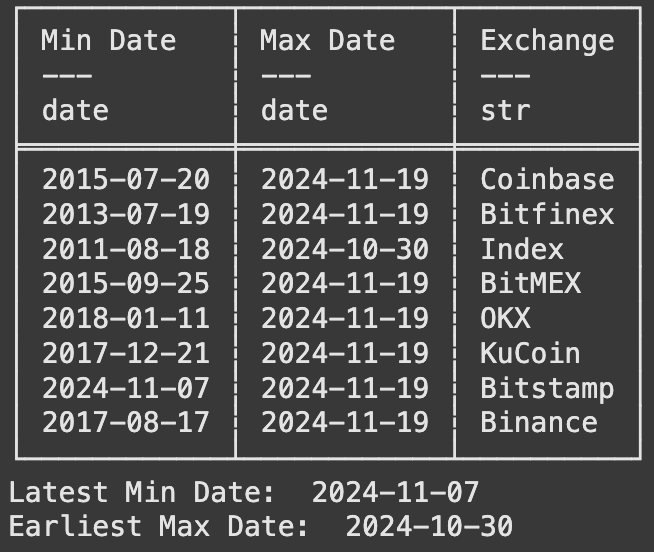

A near six year window is a far better result for our data timeframe, even having to restrict our Max Date to September. These results show that we'll pick the min date of 2018-01-11 and our end date, which is the last date of our Gold dataset of 2024-09-19.

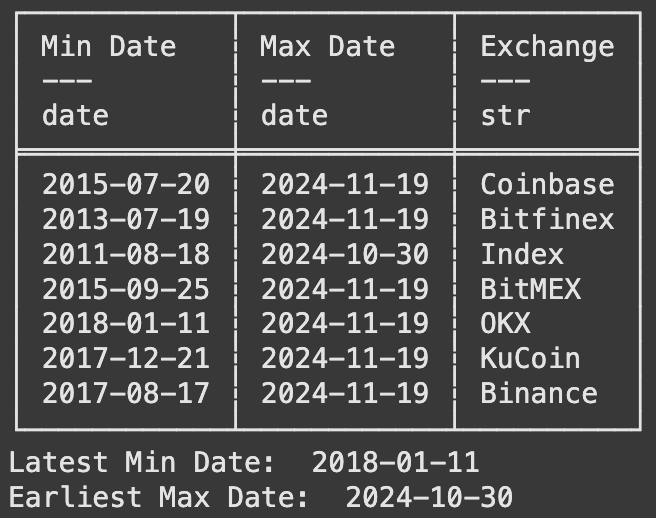

Next is checking if we contiguous dates for our datasets. Looking at the BTC exchanges, they're fully populated with dates within our set date range, but the Gold dataset is missing a fair number of dates. Below is a quick cross check of the date columns and their results, covering each combination of BTC datasets and the delta in dates for our Gold dataset.

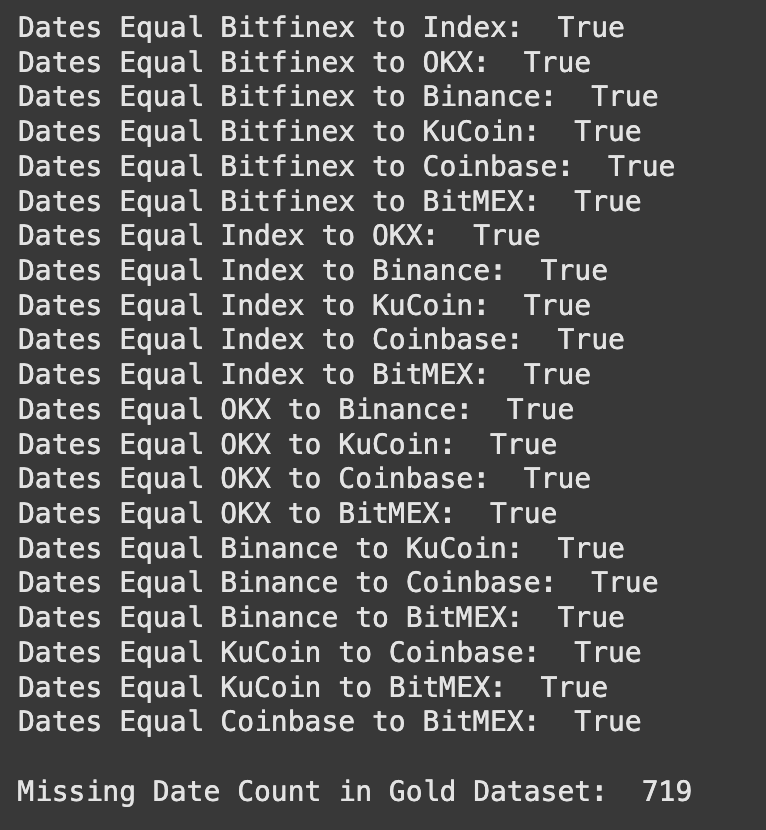

This discovery led to some investigation of the condition of the Gold dataset and the distribution of missing dates. Getting an idea of the density of missing dates, thinking that clusters of missing dates could obscure valuable info, I plotted a simple histogram to see if there was any clustering of missing values. I found that the missing dates were pretty well spread out, with some regular spaces where dates usually weren't missing.

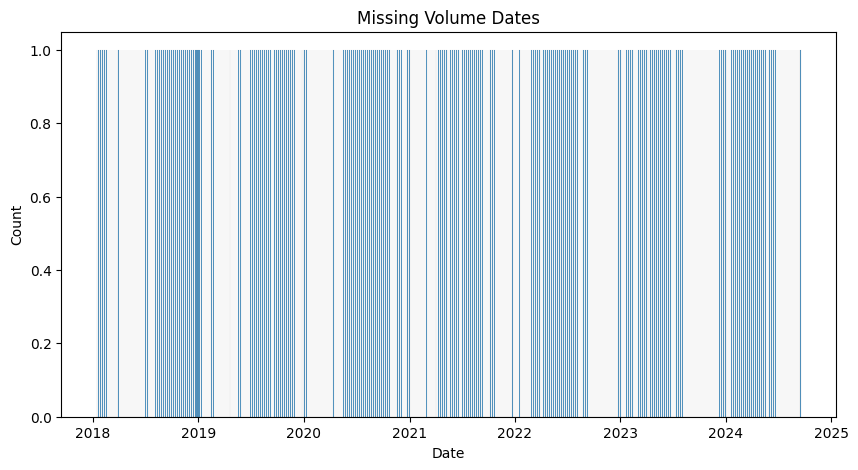

I also considered that there may be certain frequent missed dates like holidays and other regular missed days. I found that Christmas and New Years were consistently missed, but most other days were only repeated once or twice over the seven year period, so the missing days were pretty irregular. I feel this would make interpolating the missing values okay since we'll have similar seasonal values for other years. The below chart shows all Month/Day pairs that occured in the null data set with frequency greater than three.

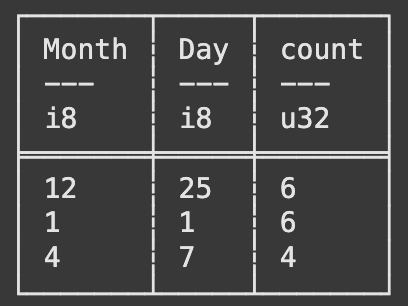

## Dataset Reduction Possibilities
The dataset has some possible repeated information sources like tightly dependent columns or possibly some of the Exchanges showing similar results. So I did some analysis on the data to see if there was any trimming I could do to simplify the dataset some.

First I looked at the similarity of the BTC exchanges. I first plotted the Opening column for each exchange and saw only one line for all the exhanges in the dataset, which led me to think these exchanges are reflect the same data. To nail this down more concretely, I did a box plot of the Open value for all the exchanges and found no differenc as well between their means, standard deviations and quartile values. With this info I've inferred the exchanges mimic the same data and will use the Index Exchange as our BTC values, renaming it to BTC for simplicity. Below is the mentioned box plot showing the similarity of the BTC datasets.

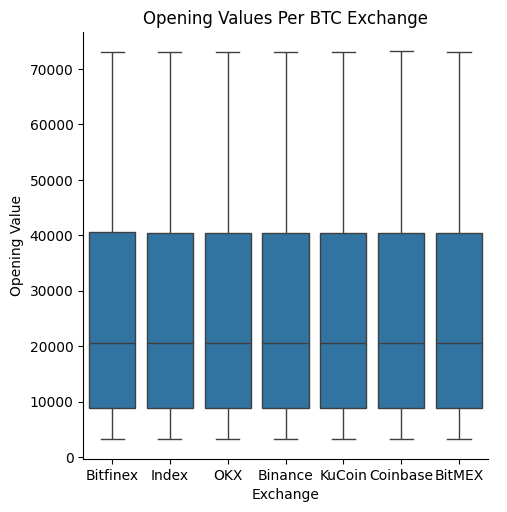

This reduction in exchanges allowed not only for far less data to be used, but also cleaned up plots like our trend plot of the Open value for both Gold and BTC. This data was ploted on two axis to help reduce the visual difference of the scale of the Open values. We can see the two diverge a bit from 2019 to 2021, but there's already some visible similarity to explore here.

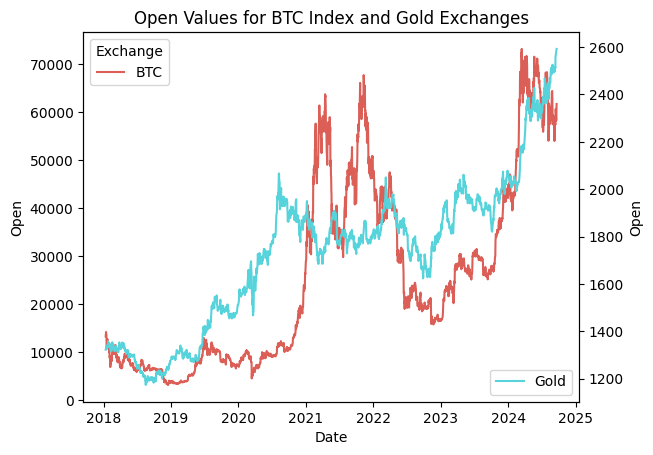

It's at this point, seeing the magnitude difference clearly in the two datasets that I min/max normalized the columns, and computed a difference column for both the Open and Volumn columns to impute some information about the changes in values for those two columns for future use. I avoided the others initiallly, assuming that there's probably a very strong correlation with the value columns of the exchanges, which the pair plot reflected well.

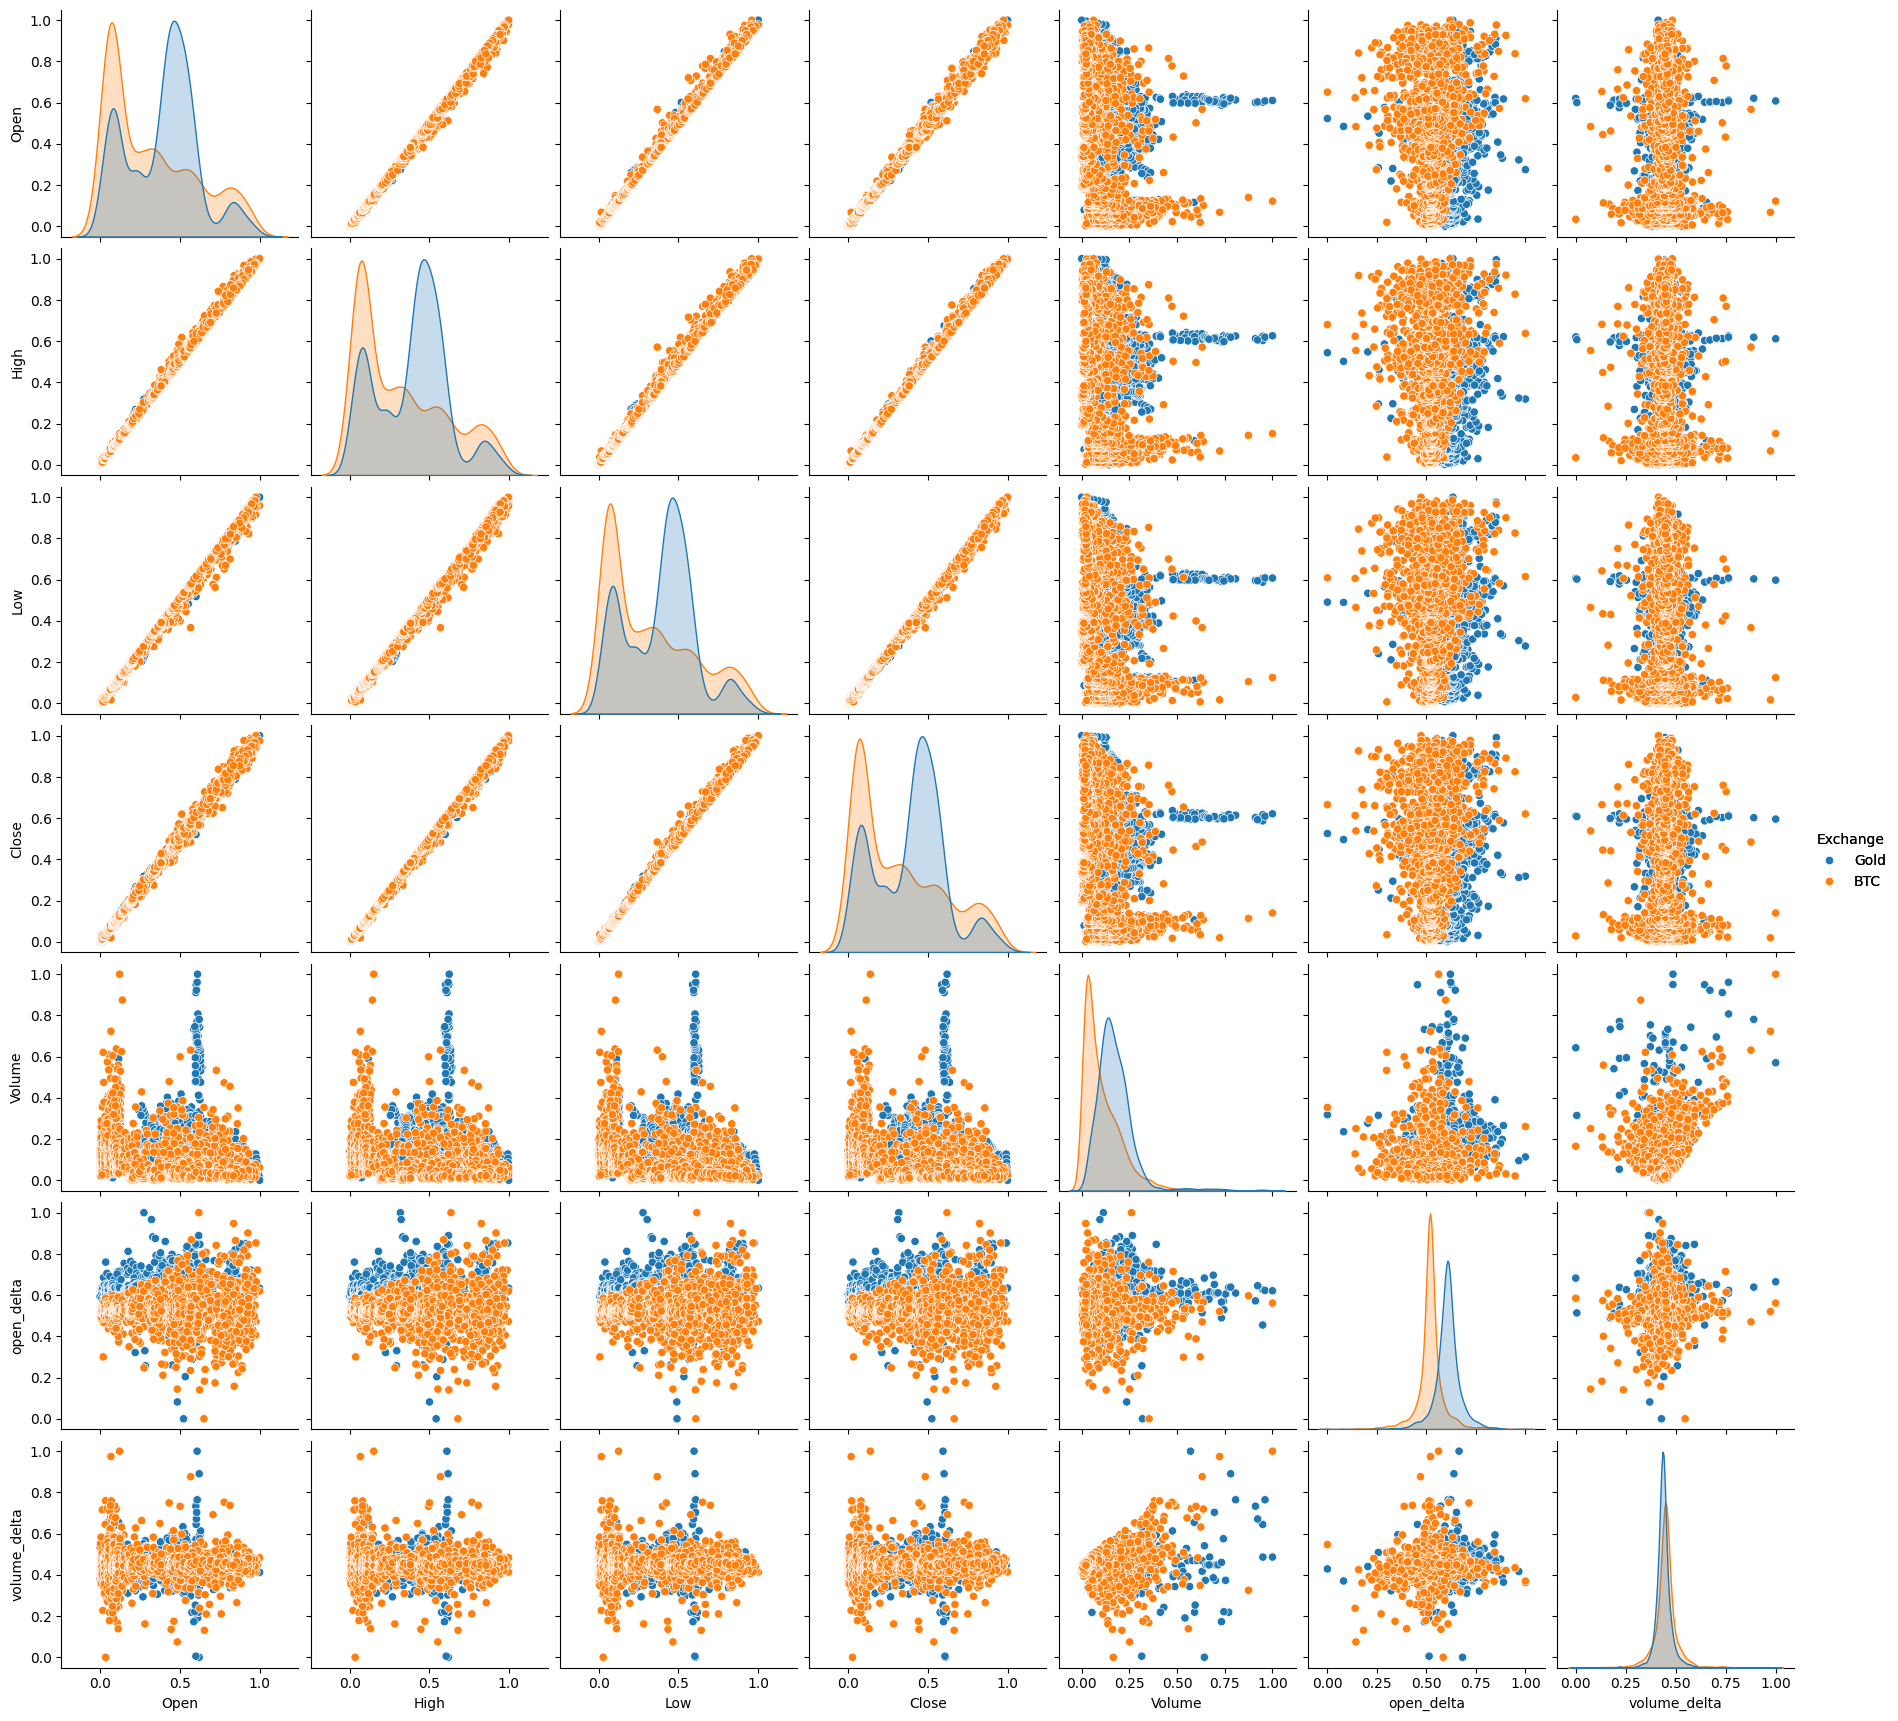

Seeing the pair plot above, there's clearly a strong correlation between the Open, High, Low, Close columns, which reasonably makes a lot of sense as they're really different measure of the same info, just diffrent view points. The delta columns look pretty well distributed, with some horn shaped increase for the open_delta column. But these colums appear to be pretty well spread for some analysis, possibly even some non-serial methods depending on some further inspection. The BTC is also more zero centered in the distributions which makes sense since BTC is far newer than the tracking of Gold value, and it's lower values are reflected in the dataset.

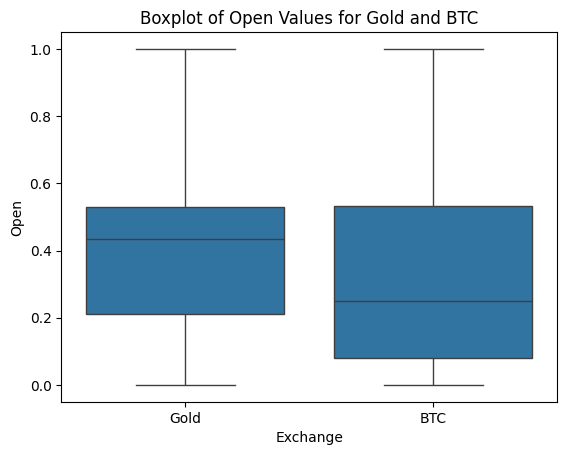

The above box plot shows another view of the distribution of Open values for the both datasets. It reflects similar findings that more lower values are available for BTC as well as it's normalized mean is lower than the gold one. Also, Gold's deviation above the mean is much smaller than BTC, and BTC's lower deviation is much smaller than Gold's. This reflects the huge increase that BTC has seen compared to Gold's more steady state. I think remove the pre 2021 data, these may even out since this is where they deviated from each other the most. This is a fair change since we're looking for long term future trends, and BTC is at a disadvantage for being a newer medium than Gold for trade.

# Modeling Methods

# Appendix

## Bibliography

Laboure, Marion (2024). Bitcoin could potentially become the 21st century gold. [online] Available at: https://www.db.com/what-next/digital-disruption/dossier-payments/i-could-potentially-see-bitcoin-to-become-the-21st-century-gold.

Novandra Anugrah (2024). XAU/USD Gold Price Historical Data (2004-2024). [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/novandraanugrah/xauusd-gold-price-historical-data-2004-2024.

Bukhari, I. (2024). Bitcoin BTC, 7 Exchanges, 1m Full Historical Data. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/imranbukhari/comprehensive-btcusd-1m-data [Accessed 19 Nov. 2024].

‌

## Code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# module imports
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import kagglehub
import os
from itertools import combinations

In [3]:
# Download latest version
data_dict = {
    "btc": kagglehub.dataset_download("imranbukhari/comprehensive-btcusd-1m-data"),
    "gold": kagglehub.dataset_download("novandraanugrah/xauusd-gold-price-historical-data-2004-2024")
}

files = {}
for k, p in data_dict.items():
    files[k] = [ x[2] for x in os.walk(p)][0]
    print(f"{k} files: {files[k]}")

btc files: ['BTCUSD_1m_Bitfinex.csv', 'BTCUSD_1m_Combined_Index.csv', 'BTCUSD_1m_OKX.csv', 'BTCUSD_1m_Binance.csv', 'BTCUSD_1m_Bitstamp.csv', 'BTCUSD_1m_KuCoin.csv', 'BTCUSD_1m_Coinbase.csv', 'BTCUSD_1m_BitMEX.csv']
gold files: ['XAU_4h_data_2004_to_2024-09-20.csv', 'XAU_5m_data_2004_to_2024-09-20.csv', 'XAU_1d_data_2004_to_2024-09-20.csv', 'XAU_30m_data_2004_to_2024-09-20.csv', 'XAU_1h_data_2004_to_2024-09-20.csv', 'XAU_15m_data_2004_to_2024-20-09.csv', 'XAU_1w_data_2004_to_2024-09-20.csv', 'XAU_1Month_data_2004_to_2024-09-20.csv']


In [4]:
# Fetching Gold Data
gold_pl = pl.read_csv(data_dict['gold'] + '/XAU_1d_data_2004_to_2024-09-20.csv')
gold_pl.head()

shape: (5, 7)
┌────────────┬───────┬───────┬───────┬───────┬───────┬────────┐
│ Date       ┆ Time  ┆ Open  ┆ High  ┆ Low   ┆ Close ┆ Volume │
│ ---        ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---    │
│ str        ┆ str   ┆ f64   ┆ f64   ┆ f64   ┆ f64   ┆ i64    │
╞════════════╪═══════╪═══════╪═══════╪═══════╪═══════╪════════╡
│ 2004.06.11 ┆ 00:00 ┆ 384.0 ┆ 384.8 ┆ 382.8 ┆ 384.1 ┆ 272    │
│ 2004.06.14 ┆ 00:00 ┆ 384.3 ┆ 385.8 ┆ 381.8 ┆ 382.8 ┆ 1902   │
│ 2004.06.15 ┆ 00:00 ┆ 382.8 ┆ 388.8 ┆ 381.1 ┆ 388.6 ┆ 1951   │
│ 2004.06.16 ┆ 00:00 ┆ 387.1 ┆ 389.8 ┆ 382.6 ┆ 383.8 ┆ 2014   │
│ 2004.06.17 ┆ 00:00 ┆ 383.6 ┆ 389.3 ┆ 383.0 ┆ 387.6 ┆ 1568   │
└────────────┴───────┴───────┴───────┴───────┴───────┴────────┘

In [5]:
gold_pl.describe()

shape: (9, 8)
┌────────────┬────────────┬───────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ statistic  ┆ Date       ┆ Time  ┆ Open       ┆ High       ┆ Low        ┆ Close      ┆ Volume     │
│ ---        ┆ ---        ┆ ---   ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str        ┆ str        ┆ str   ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
╞════════════╪════════════╪═══════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ count      ┆ 5205       ┆ 5205  ┆ 5205.0     ┆ 5205.0     ┆ 5205.0     ┆ 5205.0     ┆ 5205.0     │
│ null_count ┆ 0          ┆ 0     ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.0        │
│ mean       ┆ null       ┆ null  ┆ 1296.65164 ┆ 1306.10636 ┆ 1286.95294 ┆ 1296.81033 ┆ 75722.2764 │
│            ┆            ┆       ┆ 1          ┆ 1          ┆ 1          ┆ 4          ┆ 65         │
│ std        ┆ null       ┆ null  ┆ 472.282414 ┆ 475.206898 ┆ 469.35262  ┆ 472.383844 ┆ 64797.3081 │
│            ┆            ┆       ┆            ┆            ┆            ┆            ┆ 92         │
│ min        ┆ 2004.06.11 ┆ 00:00 ┆ 382.8      ┆ 384.8      ┆ 381.1      ┆ 382.8      ┆ 2.0        │
│ 25%        ┆ null       ┆ null  ┆ 963.17     ┆ 975.8      ┆ 953.09     ┆ 962.83     ┆ 22297.0    │
│ 50%        ┆ null       ┆ null  ┆ 1284.83    ┆ 1291.93    ┆ 1277.81    ┆ 1284.95    ┆ 69922.0    │
│ 75%        ┆ null       ┆ null  ┆ 1677.93    ┆ 1692.78    ┆ 1663.22    ┆ 1677.61    ┆ 110485.0   │
│ max        ┆ 2024.09.19 ┆ 00:00 ┆ 2592.2     ┆ 2593.39    ┆ 2591.51    ┆ 2592.29    ┆ 679039.0   │
└────────────┴────────────┴───────┴────────────┴────────────┴────────────┴────────────┴────────────┘

In [6]:
# Cleaning gold data
gold_pl = gold_pl.with_columns(
    pl.col('Date').str.to_date()
).drop('Time')

gold_pl.describe()

shape: (9, 7)
┌────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬──────────────┐
│ statistic  ┆ Date         ┆ Open        ┆ High        ┆ Low         ┆ Close       ┆ Volume       │
│ ---        ┆ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---          │
│ str        ┆ str          ┆ f64         ┆ f64         ┆ f64         ┆ f64         ┆ f64          │
╞════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╡
│ count      ┆ 5205         ┆ 5205.0      ┆ 5205.0      ┆ 5205.0      ┆ 5205.0      ┆ 5205.0       │
│ null_count ┆ 0            ┆ 0.0         ┆ 0.0         ┆ 0.0         ┆ 0.0         ┆ 0.0          │
│ mean       ┆ 2014-08-11   ┆ 1296.651641 ┆ 1306.106361 ┆ 1286.952941 ┆ 1296.810334 ┆ 75722.276465 │
│            ┆ 10:00:20.749 ┆             ┆             ┆             ┆             ┆              │
│            ┆ 000          ┆             ┆             ┆             ┆             ┆              │
│ std        ┆ null         ┆ 472.282414  ┆ 475.206898  ┆ 469.35262   ┆ 472.383844  ┆ 64797.308192 │
│ min        ┆ 2004-06-11   ┆ 382.8       ┆ 384.8       ┆ 381.1       ┆ 382.8       ┆ 2.0          │
│ 25%        ┆ 2009-07-23   ┆ 963.17      ┆ 975.8       ┆ 953.09      ┆ 962.83      ┆ 22297.0      │
│ 50%        ┆ 2014-08-15   ┆ 1284.83     ┆ 1291.93     ┆ 1277.81     ┆ 1284.95     ┆ 69922.0      │
│ 75%        ┆ 2019-09-02   ┆ 1677.93     ┆ 1692.78     ┆ 1663.22     ┆ 1677.61     ┆ 110485.0     │
│ max        ┆ 2024-09-19   ┆ 2592.2      ┆ 2593.39     ┆ 2591.51     ┆ 2592.29     ┆ 679039.0     │
└────────────┴──────────────┴─────────────┴─────────────┴─────────────┴─────────────┴──────────────┘

In [7]:
# collecting BTC Data
btc_pl = {}
for fname in files['btc']:
    exchange = fname.split('.')[0].split('_')[-1]
    btc_pl[exchange] = pl.read_csv(data_dict['btc'] + '/' + fname)
    print(exchange)
    print(btc_pl[exchange].head())


Bitfinex
shape: (5, 6)
┌─────────────────────┬───────┬───────┬───────┬───────┬──────────┐
│ Open time           ┆ Open  ┆ Close ┆ High  ┆ Low   ┆ Volume   │
│ ---                 ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---      │
│ str                 ┆ f64   ┆ f64   ┆ f64   ┆ f64   ┆ f64      │
╞═════════════════════╪═══════╪═══════╪═══════╪═══════╪══════════╡
│ 2013-07-19 00:05:00 ┆ 85.01 ┆ 84.49 ┆ 85.01 ┆ 84.49 ┆ 50.0     │
│ 2013-07-19 00:14:00 ┆ 84.57 ┆ 84.57 ┆ 84.57 ┆ 84.57 ┆ 0.96     │
│ 2013-07-19 00:16:00 ┆ 84.57 ┆ 84.57 ┆ 84.57 ┆ 84.57 ┆ 1.92     │
│ 2013-07-19 00:17:00 ┆ 84.57 ┆ 84.5  ┆ 84.57 ┆ 84.5  ┆ 2.447873 │
│ 2013-07-19 00:29:00 ┆ 84.81 ┆ 84.81 ┆ 84.81 ┆ 84.8  ┆ 3.0      │
└─────────────────────┴───────┴───────┴───────┴───────┴──────────┘
Index
shape: (5, 6)
┌─────────────────────┬──────────┬──────┬──────┬──────┬───────┐
│ Open time           ┆ Volume   ┆ Open ┆ High ┆ Low  ┆ Close │
│ ---                 ┆ ---      ┆ ---  ┆ ---  ┆ ---  ┆ ---   │
│ str                 ┆ f64 

In [8]:
# Convert BTC time to Date and group data
for k, v in btc_pl.items():
    v = v.with_columns(
        pl.col('Open time').str.to_datetime().alias('Datetime')
    )
    v = v.group_by_dynamic('Datetime',every='1d').agg(
            pl.col('Open').first().round(2).alias('Open'),
            pl.col('High').max().round(2).alias('High'),
            pl.col('Low').min().round(2).alias('Low'),
            pl.col('Close').last().round(2).alias('Close'),
            pl.col('Volume').sum().round(2).alias('Volume')
        )

    v = v.with_columns(
        pl.col('Datetime').dt.date().alias('Date')
    ).drop('Datetime')

    btc_pl[k] = v
    desc = v.describe()
    print(k)
    print(
        desc.select(
            pl.col(pl.Float64).round(2)
            ).describe()
        )
    btc_pl[k] = v

Bitfinex
shape: (9, 6)
┌────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ statistic  ┆ Open         ┆ High         ┆ Low          ┆ Close        ┆ Volume       │
│ ---        ┆ ---          ┆ ---          ┆ ---          ┆ ---          ┆ ---          │
│ str        ┆ f64          ┆ f64          ┆ f64          ┆ f64          ┆ f64          │
╞════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ count      ┆ 9.0          ┆ 9.0          ┆ 9.0          ┆ 9.0          ┆ 9.0          │
│ null_count ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          │
│ mean       ┆ 19786.137778 ┆ 20092.547778 ┆ 19507.89     ┆ 19806.996667 ┆ 38376.984444 │
│ std        ┆ 31180.694481 ┆ 31502.193394 ┆ 30937.022561 ┆ 31219.301635 ┆ 88903.660543 │
│ min        ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          │
│ 25%        ┆ 714.74       ┆ 740.6        ┆ 698.76       ┆ 714.51       ┆ 31

In [9]:
# Find min and max dates for each exchange
min_max_dates = pl.DataFrame()
for k, v in btc_pl.items():
    min_max = v.select(
        pl.col('Date').min().alias("Min Date"),
        pl.col('Date').max().alias("Max Date")
    ).with_columns(pl.lit(k).alias('Exchange'))
    min_max_dates = pl.concat([min_max_dates, min_max], how='vertical')
print(min_max_dates)
print("Latest Min Date: ", min_max_dates['Min Date'].max())
print("Earliest Max Date: ", min_max_dates['Max Date'].min())


shape: (8, 3)
┌────────────┬────────────┬──────────┐
│ Min Date   ┆ Max Date   ┆ Exchange │
│ ---        ┆ ---        ┆ ---      │
│ date       ┆ date       ┆ str      │
╞════════════╪════════════╪══════════╡
│ 2013-07-19 ┆ 2024-11-22 ┆ Bitfinex │
│ 2011-08-18 ┆ 2024-10-30 ┆ Index    │
│ 2018-01-11 ┆ 2024-11-22 ┆ OKX      │
│ 2017-08-17 ┆ 2024-11-22 ┆ Binance  │
│ 2024-11-07 ┆ 2024-11-22 ┆ Bitstamp │
│ 2017-12-21 ┆ 2024-11-22 ┆ KuCoin   │
│ 2015-07-20 ┆ 2024-11-22 ┆ Coinbase │
│ 2015-09-25 ┆ 2024-11-22 ┆ BitMEX   │
└────────────┴────────────┴──────────┘
Latest Min Date:  2024-11-07
Earliest Max Date:  2024-10-30


In [10]:
# finding most inclusive Min and max dates
useable_min_max_dates = min_max_dates.filter(
    pl.col('Exchange') != 'Bitstamp')
print(useable_min_max_dates)
print("Latest Min Date: ", useable_min_max_dates['Min Date'].max())
print("Earliest Max Date: ", useable_min_max_dates['Max Date'].min())

shape: (7, 3)
┌────────────┬────────────┬──────────┐
│ Min Date   ┆ Max Date   ┆ Exchange │
│ ---        ┆ ---        ┆ ---      │
│ date       ┆ date       ┆ str      │
╞════════════╪════════════╪══════════╡
│ 2013-07-19 ┆ 2024-11-22 ┆ Bitfinex │
│ 2011-08-18 ┆ 2024-10-30 ┆ Index    │
│ 2018-01-11 ┆ 2024-11-22 ┆ OKX      │
│ 2017-08-17 ┆ 2024-11-22 ┆ Binance  │
│ 2017-12-21 ┆ 2024-11-22 ┆ KuCoin   │
│ 2015-07-20 ┆ 2024-11-22 ┆ Coinbase │
│ 2015-09-25 ┆ 2024-11-22 ┆ BitMEX   │
└────────────┴────────────┴──────────┘
Latest Min Date:  2018-01-11
Earliest Max Date:  2024-10-30


In [11]:
# Date Limiting Datasets Per Findings
min_date = useable_min_max_dates['Min Date'].max()
max_date = gold_pl['Date'].max()
print("Min Date: ", min_date)
print("Max Date: ", max_date)

gold_pl_ltd = gold_pl.filter(
    (pl.col('Date') >= min_date) & (pl.col('Date') <= max_date)
)
print("Gold Shape: ", gold_pl_ltd.shape)

btc_pl_ltd = {}
for k, d in btc_pl.items():
    if k == 'Bitstamp':
        continue
    btc_pl_ltd[k] = d.filter(
        (pl.col('Date') >= min_date) & (pl.col('Date') <= max_date)
    )
    print(f"{k} Shape: ", btc_pl_ltd[k].shape)

Min Date:  2018-01-11
Max Date:  2024-09-19
Gold Shape:  (1725, 6)
Bitfinex Shape:  (2444, 6)
Index Shape:  (2444, 6)
OKX Shape:  (2444, 6)
Binance Shape:  (2444, 6)
KuCoin Shape:  (2444, 6)
Coinbase Shape:  (2444, 6)
BitMEX Shape:  (2444, 6)


In [12]:
# Check if date lists are the same
for a, b in combinations(btc_pl_ltd.keys(), 2):
    print(f"Dates Equal {a} to {b}: ", btc_pl_ltd[a]['Date'].equals(btc_pl_ltd[b]['Date']))

print("\nMissing Date Count in Gold Dataset: ", len(set(btc_pl_ltd['Index']['Date']) - set(gold_pl_ltd['Date'])))

Dates Equal Bitfinex to Index:  True
Dates Equal Bitfinex to OKX:  True
Dates Equal Bitfinex to Binance:  True
Dates Equal Bitfinex to KuCoin:  True
Dates Equal Bitfinex to Coinbase:  True
Dates Equal Bitfinex to BitMEX:  True
Dates Equal Index to OKX:  True
Dates Equal Index to Binance:  True
Dates Equal Index to KuCoin:  True
Dates Equal Index to Coinbase:  True
Dates Equal Index to BitMEX:  True
Dates Equal OKX to Binance:  True
Dates Equal OKX to KuCoin:  True
Dates Equal OKX to Coinbase:  True
Dates Equal OKX to BitMEX:  True
Dates Equal Binance to KuCoin:  True
Dates Equal Binance to Coinbase:  True
Dates Equal Binance to BitMEX:  True
Dates Equal KuCoin to Coinbase:  True
Dates Equal KuCoin to BitMEX:  True
Dates Equal Coinbase to BitMEX:  True

Missing Date Count in Gold Dataset:  719


In [13]:
# Filling in missing dates in the Gold set
gold_match_df = gold_pl_ltd.join(
    btc_pl_ltd['Index']['Date'].to_frame(),
    on='Date',
    how='full'
    ).drop('Date').with_columns(pl.col('Date_right').alias('Date')).drop('Date_right')
gold_match_df.describe()

shape: (9, 7)
┌────────────┬─────────────┬────────────┬─────────────┬─────────────┬───────────────┬──────────────┐
│ statistic  ┆ Open        ┆ High       ┆ Low         ┆ Close       ┆ Volume        ┆ Date         │
│ ---        ┆ ---         ┆ ---        ┆ ---         ┆ ---         ┆ ---           ┆ ---          │
│ str        ┆ f64         ┆ f64        ┆ f64         ┆ f64         ┆ f64           ┆ str          │
╞════════════╪═════════════╪════════════╪═════════════╪═════════════╪═══════════════╪══════════════╡
│ count      ┆ 1725.0      ┆ 1725.0     ┆ 1725.0      ┆ 1725.0      ┆ 1725.0        ┆ 2444         │
│ null_count ┆ 719.0       ┆ 719.0      ┆ 719.0       ┆ 719.0       ┆ 719.0         ┆ 0            │
│ mean       ┆ 1729.713264 ┆ 1741.3616  ┆ 1718.448023 ┆ 1730.127496 ┆ 110268.282319 ┆ 2021-05-16   │
│            ┆             ┆            ┆             ┆             ┆               ┆ 12:00:00     │
│ std        ┆ 313.841148  ┆ 317.112329 ┆ 310.918873  ┆ 314.31556   ┆ 60320.252676  ┆ null         │
│ min        ┆ 1173.69     ┆ 1182.02    ┆ 1160.07     ┆ 1173.93     ┆ 8253.0        ┆ 2018-01-11   │
│ 25%        ┆ 1474.89     ┆ 1480.94    ┆ 1464.43     ┆ 1475.44     ┆ 75370.0       ┆ 2019-09-14   │
│ 50%        ┆ 1787.41     ┆ 1798.12    ┆ 1776.24     ┆ 1787.81     ┆ 100306.0      ┆ 2021-05-17   │
│ 75%        ┆ 1922.46     ┆ 1934.26    ┆ 1910.77     ┆ 1921.82     ┆ 134384.0      ┆ 2023-01-17   │
│ max        ┆ 2592.2      ┆ 2593.39    ┆ 2591.51     ┆ 2592.29     ┆ 591935.0      ┆ 2024-09-19   │
└────────────┴─────────────┴────────────┴─────────────┴─────────────┴───────────────┴──────────────┘

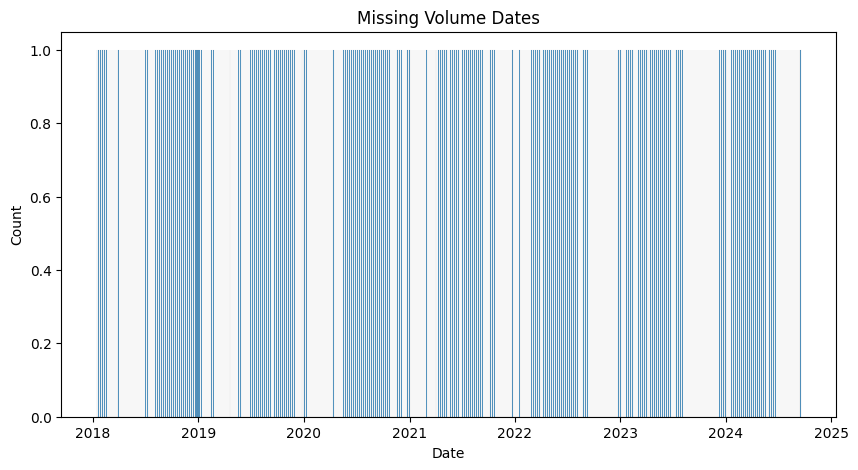

In [14]:
# hist plot to show null row distribution by date
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=gold_match_df.filter(pl.col('Volume').is_null()), x='Date', bins=2500, ax=ax)
ax.set_title('Missing Volume Dates')
plt.show()

In [15]:
# checking if there's more frequent dates with nulls, like holidays
date_comparison = gold_match_df.filter(pl.col('Volume').is_null()).select(
    pl.col('Date'),
    pl.col('Date').dt.month().alias('Month'),
    pl.col('Date').dt.day().alias('Day')
).group_by(['Month', 'Day']).count().sort('count',descending=True)
print(date_comparison.filter(pl.col('count') > 3))




shape: (3, 3)
┌───────┬─────┬───────┐
│ Month ┆ Day ┆ count │
│ ---   ┆ --- ┆ ---   │
│ i8    ┆ i8  ┆ u32   │
╞═══════╪═════╪═══════╡
│ 12    ┆ 25  ┆ 6     │
│ 1     ┆ 1   ┆ 6     │
│ 4     ┆ 7   ┆ 4     │
└───────┴─────┴───────┘


<ipython-input-15-256950d7c6cc>:6: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  ).group_by(['Month', 'Day']).count().sort('count',descending=True)


In [16]:
# iterpolating missing gold data so dates match with BTC data
gold_interp_df = gold_match_df.interpolate()
gold_interp_df.describe()

shape: (9, 7)
┌────────────┬─────────────┬─────────────┬─────────────┬─────────────┬──────────────┬──────────────┐
│ statistic  ┆ Open        ┆ High        ┆ Low         ┆ Close       ┆ Volume       ┆ Date         │
│ ---        ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---          ┆ ---          │
│ str        ┆ f64         ┆ f64         ┆ f64         ┆ f64         ┆ f64          ┆ str          │
╞════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪══════════════╡
│ count      ┆ 2444.0      ┆ 2444.0      ┆ 2444.0      ┆ 2444.0      ┆ 2444.0       ┆ 2444         │
│ null_count ┆ 0.0         ┆ 0.0         ┆ 0.0         ┆ 0.0         ┆ 0.0          ┆ 0            │
│ mean       ┆ 1731.020698 ┆ 1742.64484  ┆ 1719.768365 ┆ 1731.446135 ┆ 109401.34063 ┆ 2021-05-16   │
│            ┆             ┆             ┆             ┆             ┆              ┆ 12:00:00     │
│ std        ┆ 315.164719  ┆ 318.502498  ┆ 312.184989  ┆ 315.62491   ┆ 59427.062784 ┆ null         │
│ min        ┆ 1173.69     ┆ 1182.02     ┆ 1160.07     ┆ 1173.93     ┆ 8253.0       ┆ 2018-01-11   │
│ 25%        ┆ 1474.89     ┆ 1480.94     ┆ 1465.42     ┆ 1475.593333 ┆ 75255.0      ┆ 2019-09-14   │
│ 50%        ┆ 1787.93     ┆ 1798.65     ┆ 1776.946667 ┆ 1788.56     ┆ 100186.66666 ┆ 2021-05-17   │
│            ┆             ┆             ┆             ┆             ┆ 7            ┆              │
│ 75%        ┆ 1922.7      ┆ 1934.703333 ┆ 1911.4      ┆ 1923.04     ┆ 132398.33333 ┆ 2023-01-17   │
│            ┆             ┆             ┆             ┆             ┆ 3            ┆              │
│ max        ┆ 2592.2      ┆ 2593.39     ┆ 2591.51     ┆ 2592.29     ┆ 591935.0     ┆ 2024-09-19   │
└────────────┴─────────────┴─────────────┴─────────────┴─────────────┴──────────────┴──────────────┘

In [17]:
# creating opening value delta column and volume delta colulmn
btc_pl_ltd = {exch: d.with_columns(
    pl.lit(exch).alias('Exchange'),
    open_delta = pl.col('Open').diff(),
    volume_delta = pl.col('Volume').diff()
    ).drop_nulls() for exch, d in btc_pl_ltd.items()}
print(btc_pl_ltd['Index'].describe())

gold_interp_df = gold_interp_df.with_columns(
    pl.lit('Gold').alias('Exchange'),
    open_delta = pl.col('Open').diff(),
    volume_delta = pl.col('Volume').diff()
    ).drop_nulls()
print(gold_interp_df.describe())

shape: (9, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ statistic ┆ Open      ┆ High      ┆ Low       ┆ … ┆ Date      ┆ Exchange ┆ open_delt ┆ volume_de │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ a         ┆ lta       │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ str       ┆ str      ┆ ---       ┆ ---       │
│           ┆           ┆           ┆           ┆   ┆           ┆          ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ count     ┆ 2443.0    ┆ 2443.0    ┆ 2443.0    ┆ … ┆ 2443      ┆ 2443     ┆ 2443.0    ┆ 2443.0    │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0         ┆ 0        ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆           │
│ mean      ┆ 25857.630 ┆ 26495.380 ┆ 25162.522 ┆ … ┆ 2021-05-1 ┆ null     ┆

In [18]:
# combining datasets
combined_df = pl.concat([gold_interp_df, *btc_pl_ltd.values()])
combined_df.shape

(19544, 9)

Text(0.5, 1.0, 'Opening Values Per BTC Exchange')

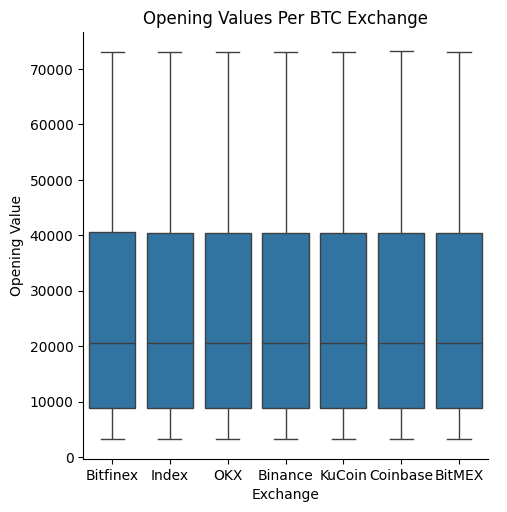

In [19]:
# Box plot of opening values per exchange
sns.catplot(data=combined_df.filter(pl.col('Exchange')!='Gold'), x='Exchange', y='Open', kind='box')
plt.xlabel('Exchange')
plt.ylabel('Opening Value')
plt.title("Opening Values Per BTC Exchange")


In [20]:
# reducing dataset to just Index BTC and Gold since all BTC are the same
dataset = combined_df.filter(pl.col('Exchange').str.contains('Index|Gold'))
dataset = dataset.with_columns(pl.col('Exchange').str.replace('Index', 'BTC'))
dataset.shape

(4886, 9)

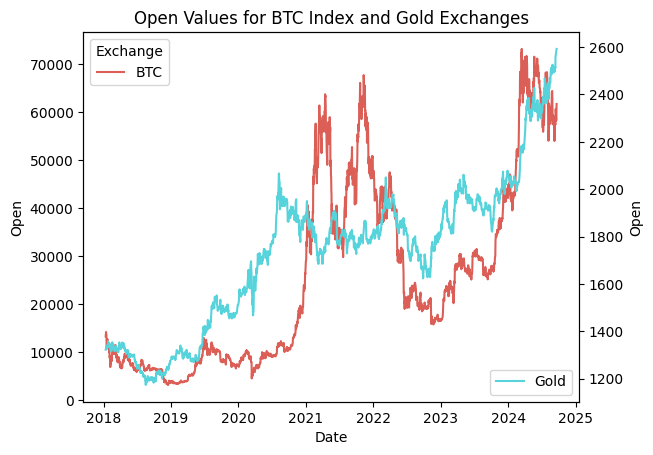

In [21]:
colors = sns.color_palette('hls', len(dataset['Exchange'].unique())).as_hex()

sns.lineplot(data=dataset.filter(pl.col('Exchange')=='BTC'), x='Date', y='Open', hue='Exchange', palette=[str(colors[0])])
ax2 = plt.twinx()
sns.lineplot(data=dataset.filter(pl.col('Exchange')=='Gold'), x='Date', y='Open', hue='Exchange', ax=ax2, palette=[str(colors[1])])
ax2.legend(loc='lower right')
plt.title("Open Values for BTC Index and Gold Exchanges")
plt.show()

In [28]:
#normalizing data
def min_max_normalization(col):
    return (col - col.min()) / (col.max() - col.min())

gold_norm = dataset.filter(pl.col('Exchange')=='Gold').with_columns(
    pl.col(pl.Float64).map_batches(min_max_normalization)
)

btc_norm = dataset.filter(pl.col('Exchange') == 'BTC').with_columns(
    pl.col(pl.Float64).map_batches(min_max_normalization)
)

dataset_norm = pl.concat([gold_norm, btc_norm])



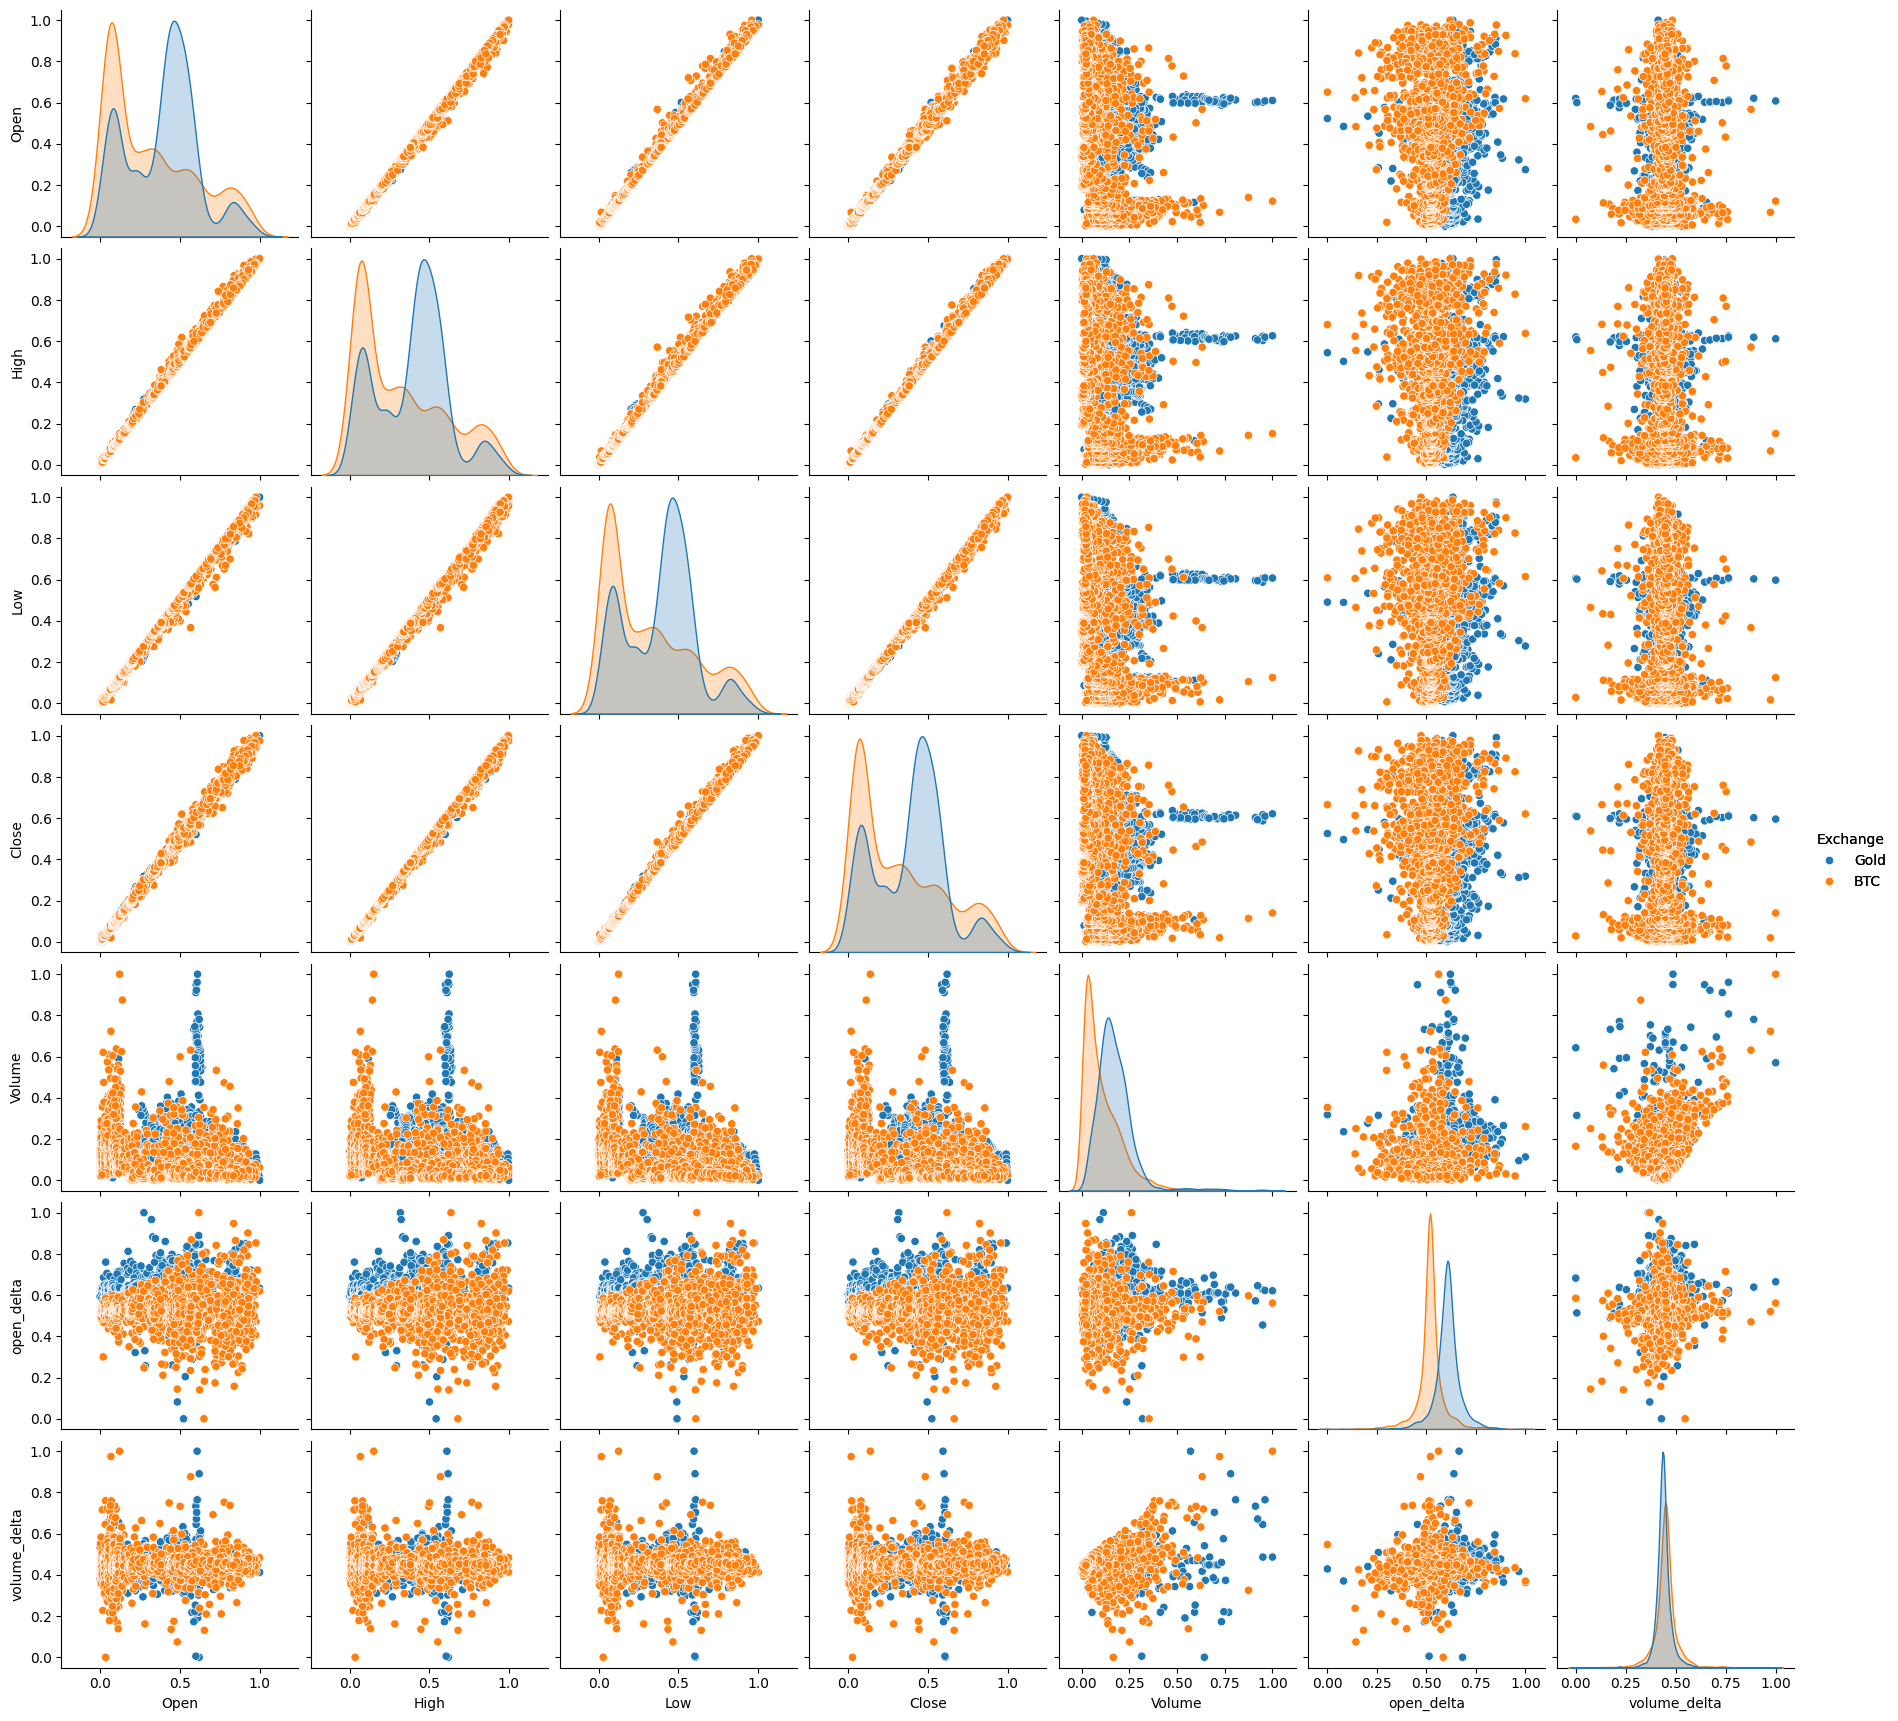

In [36]:
# pair plot
pp = sns.pairplot(
    data=dataset_norm.to_pandas(), hue='Exchange', diag_kind='kde')
pp.add_legend()



Text(0.5, 1.0, 'Boxplot of Open Values for Gold and BTC')

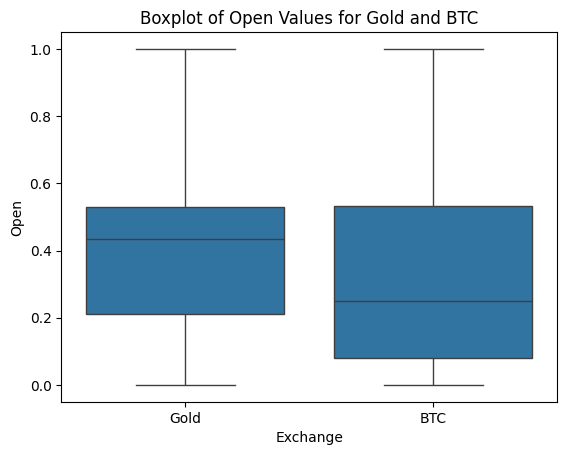

In [33]:
bp = sns.boxplot(data=dataset_norm.to_pandas(), x='Exchange', y='Open')
bp.set_title("Boxplot of Open Values for Gold and BTC")